In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

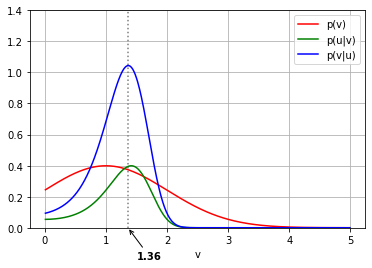

In [2]:
u = 2
sigma_u = 1
vp = 1
sigma_p = 1
v = np.arange(0.01, 5, 0.01)
infer_epoch = 1000

dt = 0.01

PUV = norm.pdf(u, v**2, sigma_u)
PV = norm.pdf(v, vp, sigma_p)
numer = PUV * PV
denom = np.sum(numer * dt) # 分母＝分子をvで積分
PVU = numer / denom

fig = plt.figure()
plt.plot(v, PV, color='r', label='p(v)')
plt.plot(v, PUV, color='g', label='p(u|v)')
plt.plot(v, PVU, color='b', label='p(v|u)')
plt.vlines(np.argmax(PVU)/100, -0.05, 1.4, color='#7d7d7d', linestyle='dotted')
plt.xlabel('v')
plt.legend()
plt.ylim(0, 1.4)
plt.annotate(np.argmax(PVU)/100, (np.argmax(PVU)/100, -0), (1.5, -0.2), arrowprops=dict(arrowstyle="->"), fontweight=1000)
plt.grid()
plt.show()

# fig.savefig("img1.jpg", dpi=200)

In [3]:
for i in range(50):
    phi_1 = list(range(infer_epoch))
    phi_1[0] = vp_1
    ep_1 = list(range(infer_epoch))
    ep[0] = (phi[0] - vp) / sigma_p
    eu = list(range(infer_epoch))
    eu[0] = (u - (phi_1[0] + phi_2[0])) / sigma_u
    # 推測
    for j in range(1, infer_epoch):
        phi[j] = phi[j-1] + dt * (-ep[j-1] + eu[j-1] * (2 * phi[j-1]))
        ep[j] = ep[j-1] + dt * (phi[j-1] - vp - sigma_p * ep[j-1])
        eu[j] = eu[j-1] + dt * (u - phi[j-1] ** 2 - sigma_u * eu[j-1])

    phi[0] = phi[-1]
    ep[0] = ep[-1]
    eu[0] = eu[-1]

    # 学習
    vp = vp + ep[-1] * dt
    sigma_p = max(sigma_p + 1/2 * (ep[-1]**2 - 1/sigma_p) * dt, 1)
    sigma_u = max(sigma_u + 1/2 * (eu[-1]**2 - 1/sigma_u) * dt, 1) 



NameError: name 'vp_1' is not defined

import glob
import cv2

img_array = []
for filename in sorted(glob.glob("fep/img2/*.jpg")):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

name = 'project.mp4'
out = cv2.VideoWriter(name, cv2.VideoWriter_fourcc(*'MP4V'), 5.0, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()